In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
data = fetch_california_housing(as_frame=True)

In [2]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
data.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

Пункты 3 и 4, которые дальше будут повторяться

In [5]:
class FitScore:
    '''Repetitive fitting and table printing.'''
    header_str = '''|model|RMSE|R2|\n|--|--|--|'''
    def __init__(self):
        self.scores = ''
    def run(self,X,y,model_desc):
        if model_desc in self.scores: # пропускаем запуски того, что уже мерили
            pass
        else:
            model = LinearRegression()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            self.scores += '''\n|%s| %.05f | %.05f |''' % (model_desc, mean_squared_error(y_pred,y_test), r2_score(y_pred, y_test))
    def pr(self):
        printmd(self.header_str + self.scores)
fs = FitScore()


In [6]:
fs.run(data.data, data.target, 'без преобразований')
fs.pr()

|model|RMSE|R2|
|--|--|--|
|без преобразований| 0.50129 | 0.35488 |

Распределение целевой переменной

<AxesSubplot:>

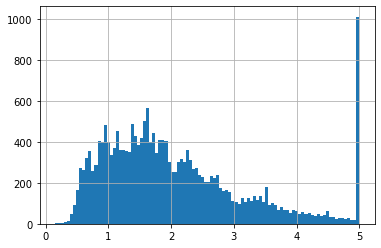

In [7]:
# sns.boxplot(x=data.target,) # не очень понятно, что за распределение - только виден выброс
data.target.hist(bins=100)

Выброс есть явный - на 5.   
Не хотелось бы его просто выбрасывать, т.к. в нем много данных (1000 строк).  
Для начала просто удалим эти строки. И потом уже построим корреляцию с остальными признаками.  

<AxesSubplot:>

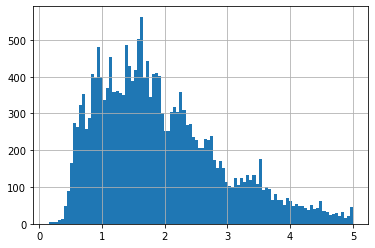

In [8]:
df = pd.concat([data.data, data.target], axis = 1)
# df.loc[df.MedHouseVal>4].shape
# df.loc[df.MedHouseVal>5.0001].MedHouseVal.hist(bins=100)
# выброс хитрый - очень близко к 5, но не 5. А 5.00001. Какая-то явно компьютерная ошибка округления.
df.loc[df.MedHouseVal<5.00001].MedHouseVal.hist(bins=100) # вот так красиво уже

In [9]:
df1 = df.loc[df.MedHouseVal<5.00001]

In [10]:
# заглушено, т.к. долго работатет - график лежит рядом в папке
# sns.pairplot(df1)

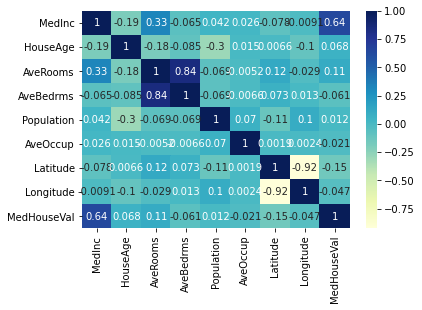

In [11]:
# from https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
import matplotlib.pyplot as mp
# print(df1.corr())
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
mp.show()


Наиболее слабым выглядит признак Population - удалим его.

На будущее - хорошо бы нормировать признаки 
* AveOccup
* AveBedrms
* AveOccup

In [12]:
# Удалили выбросы целевой колонки и удалили неинформативную колонку Population - строим метрики
# Странно - на pairplot менее информативной выглядит колонка HouseAge
df11 = df1[[c for c in df1.columns if c != 'Population']]
df12 = df1[[c for c in df1.columns if c != 'HouseAge']]
df11_X = df11[[c for c in df11.columns if c != 'MedHouseVal']]
df12_X = df12[[c for c in df12.columns if c != 'MedHouseVal']]

fs.run(df1[[c for c in df1.columns if c != 'MedHouseVal']],df1.MedHouseVal,'удалены только выбросы целевой')
fs.run(df11_X,df11.MedHouseVal,'удалены выбросы целевой и колонка Population')
fs.run(df12_X,df12.MedHouseVal,'удалены выбросы целевой и колонка HouseAge')
fs.pr()


|model|RMSE|R2|
|--|--|--|
|без преобразований| 0.50129 | 0.35488 |
|удалены только выбросы целевой| 0.43085 | 0.23797 |
|удалены выбросы целевой и колонка Population| 0.39346 | 0.30219 |
|удалены выбросы целевой и колонка HouseAge| 0.38744 | 0.25648 |

Имеет смысл заменить широту и долготу на расстояние от центра - добавить такую колонку.  
Плюс взять корень от MedInc, т.к. доход различается не линейно, а в разы. Можно и логарифм.

<AxesSubplot:>

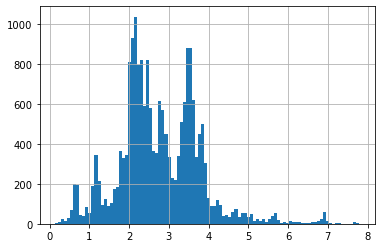

In [18]:
df2 = df12.copy() # за основу возьмем данные без выбросов целевой и колонки HouseAge - минимальная RMSE
df2['CenterDist'] = np.sqrt((df2.Latitude.mean() - df2.Latitude)**2 + (df2.Longitude.mean() - df2.Longitude)**2)
df2.CenterDist.hist(bins=100)

<AxesSubplot:>

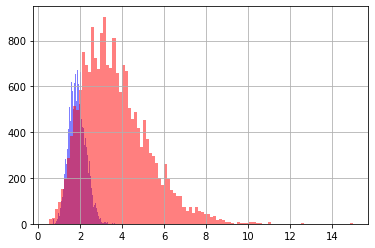

In [25]:
df2['SqrtMedInc'] = np.sqrt(df2.MedInc)
df2.SqrtMedInc.hist(bins=100, fc=(0, 0, 1, 0.5))
df2.MedInc.hist(bins=100, fc=(1, 0, 0, 0.5))

In [27]:
df2_X = df2[[c for c in df2.columns if c != 'MedHouseVal']]
fs.run(df2_X,df2.MedHouseVal,'удалены выбросы целевой, колонка HouseAge, добавлены SqrtMedInc и CenterDist')
fs.pr()

|model|RMSE|R2|
|--|--|--|
|без преобразований| 0.50129 | 0.35488 |
|удалены только выбросы целевой| 0.43085 | 0.23797 |
|удалены выбросы целевой и колонка Population| 0.39346 | 0.30219 |
|удалены выбросы целевой и колонка HouseAge| 0.38744 | 0.25648 |
|удалены выбросы целевой, колонка HouseAge, добавлены SqrtMedInc и CenterDist| 0.41747 | 0.19128 |

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19675 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19675 non-null  float64
 1   AveRooms     19675 non-null  float64
 2   AveBedrms    19675 non-null  float64
 3   Population   19675 non-null  float64
 4   AveOccup     19675 non-null  float64
 5   Latitude     19675 non-null  float64
 6   Longitude    19675 non-null  float64
 7   MedHouseVal  19675 non-null  float64
 8   CenterDist   19675 non-null  float64
 9   SqrtMedInc   19675 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


R2 падает - в основном из-за антикорреляции.  
Бороться с этим можно. Например, брать не расстояние от центра, а минус расстояние от центра (дальше от центра - дешевле недвижимость).  
Посмотреть другие колонки на антикорреляцию по матрице корреляции.

RMSE на последней итерации возрасла - тоже нужно разбираться. Было сделано два изменения. Может одно сделало лушче, другое - хуже.
Поскольку рост показателей желателен, но не обязателен, оставлю как есть.
